# Homework #0 (Due 09/09/2021, 11:59pm)
## Review of Stastistical Modeling and Scientific Computing

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2021**

**Name: Jiahui Tang**

**Students collaborators: Yujie Cai, Xin Zeng**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. ***Portions of your submission that contains syntactic or run-time errors will not be graded***.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Part I: Maximum Likelihood Estimators for Linear Regression
### (Material covered in CS109A or equivalent)
In this problem, you are given a dataset with a single predictor $X$ representing patient age (in years) and a single outcome $y$ representing diastolic blood pressure (in mm Hg), and your task is to fit a linear model to the data. The fitted model will be deployed in a hospital setting, where the model predictions will inform patient treatment. 

The dataset is saved as `HW0_data.csv` in CSV (Comma Separated Values) format and can be read using the `.read_csv()` function from the `pandas` library.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)
\end{aligned}
where $w_1$ and $w_0$, the *parameters* of the function $f$, are unknown constants. 

1. **(Model Building)** Write the analytical expression for the likelihood function $p(y|x, w_1, w_0)$, for a single observation $(x, y)$. Write the analytical expression for the likelihood function $\prod_{n=1}^N p(y_n|x_n, w_1, w_0)$ for an entire dataset of $N$ number of observations. 

  *Hint: for a given $x$ and fixed parameters, what is the distribution of $y$?*

<font color='#00007B'>
    
**Answer:** 

For a given $x$ and fixed parameters, the distribution of $y$ follows the normal distribution of $\epsilon$.

Consider a sample of single observation $(x,y)$ from $\mathcal{N}(0, 0.5)$, i.e. from the pdf,

$$ p(y|x, w_1, w_0) = \frac{1}{\sqrt{2\pi * 0.5}} \exp\left\{-\frac{(y - (w_1x + w_0))^2}{2 * 0.5} \right\}$$ 

$$= \frac{1}{\sqrt{\pi }} \exp\left\{-{(y - (w_1x + w_0))^2} \right\}$$ 

Thus, the likelihood function 

$\prod_{n=1}^N p(y_n|x_n, w_1, w_0)$ for an entire dataset of $N$ number of observations follows:

$$\prod_{n=1}^N p(y_n|x_n, w_1, w_0) 
= \frac{1}{\sqrt{\pi }^N} \exp\left\{\sum_{n=1}^N{-{(y_n - (w_1x_n + w_0))^2}} \right\}$$ 

2. **(Defining a Learning Objective)** The Maximum Likelihood Estimators (MLE) of $w_1$ and $w_0$ are defined as
\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n|x_n, w_1, w_0)
\end{aligned}
Show that finding $w_1$ and $w_0$ that maximizes the likelihood is equivalent to finding parameters that minimize the Mean Squared Error (MSE) of your model.<br><br>
*Hint: show that maximizing the log likelihood is equivalent to minimizing the MSE.*

<font color='#00007B'>

**Answer**:

i.
As ***maximizing the likelihood is equivalent to maximizing the log likelihood*** due to the following fact. 

**Theorem:**  For any $f: \mathbb{R}^D \to \mathbb{R}$, we have that $x^* = \underset{\theta}{\mathrm{argmax}}\; f(x)$ if and only if $x^* = \underset{\theta}{\mathrm{argmax}}\; \log (f(x))$.

***Proof:*** Recall that the monotone property of the $\log: \mathbb{R} \to \mathbb{R}$ function:

$$
z_1 < z_2 \text{ if and only if } \log(z_1) < \log(z_2).
$$

Suppose that $x^* = \underset{\theta}{\mathrm{argmax}}\; f(x)$, then for all $x\in \mathbb{R}^D$ we must have that $f(x) \leq f(x^*)$. Hence, it follow from the monotonicity of $\log$ that $\log(f(x)) \leq \log(f(x^*))$, for all $x\in \mathbb{R}^D$. So, by definition, we have that $x^* = \underset{\theta}{\mathrm{argmax}}\; \log (f(x))$. <br><br> Now suppose that $x^* = \underset{\theta}{\mathrm{argmax}}\; \log (f(x))$, for all $x\in \mathbb{R}^D$. That is, for any $x\in \mathbb{R}^D$, we have that $\log (f(x)) \leq \log (f(x^*))$. It then follows from the monotonicity of $\log$ that $ f(x) \leq f(x^*)$ for all $x\in \mathbb{R}^D$. By definition, we conclude that $x^* = \underset{\theta}{\mathrm{argmax}}\; f(x)$. 


<font color='#00007B'>

ii.
Thus, given the likelihood function, we first derive the log likelihood function as below:


$$\log \prod_{n=1}^N p(y_n|x_n, w_1, w_0) = N\log\left(\frac{1}{\sqrt{\pi }}\right) - \sum_{n=1}^N{{(y_n - (w_1x_n + w_0))^2}} $$

To maximize loglikehood, 

\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n|x_n, w_1, w_0) = 
\underset{w_1, w_0}{\mathrm{argmax}}\;  \log \prod_{n=1}^N p(y_n|x_n, w_1, w_0) = 
\underset{w_1, w_0}{\mathrm{argmax}}\; N\log\left(\frac{1}{\sqrt{\pi }}\right) - \sum_{n=1}^N{{(y_n - (w_1x_n + w_0))^2}}
\end{aligned}

Since $N\log\left(\frac{1}{\sqrt{\pi }}\right)$ is constant for a given $N$, 
$$\underset{w_1, w_0}{\mathrm{argmax}}\; N\log\left(\frac{1}{\sqrt{\pi }}\right) - \sum_{n=1}^N{{(y_n - (w_1x_n + w_0))^2}}$$

is equivalent to minimize the second part,

$$\underset{w_1, w_0}{\mathrm{argmin}}\; \sum_{n=1}^N{{(y_n - (w_1x_n + w_0))^2}}$$

Essentially, it is equivalent to 
 $$\equiv \mathrm{argmin}_{w_0, w_1}\frac{1}{N}\sum_{n=1}^N |y_n - (w_1x_n + w_0)|^2 $$


As we know, **Mean squared errors** is the average of squared errors between observed $\hat{y}$ and predicted $y$.
$$
\frac{1}{N}\sum_{n=1}^N |y_n - \hat{y}_n|^2 = \frac{1}{N}\sum_{n=1}^N |y_n - (w_1x_n + w_0)|^2
$$

Q.E.D

Thus, we show that maximizing the log likelihood is equivalent to minimizing the MSE.

$$
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n|x_n, w_1, w_0)
\equiv \mathrm{argmin}_{w_0, w_1}\frac{1}{N}\sum_{n=1}^N |y_n - (w_1x_n + w_0)|^2 $$

3. **(Model Fitting)** Analytically derive the formulae for MLE of $w_1$ and $w_0$. Describe what information you would need in order ***prove*** that the parameters you derived maximizes the likelihood (or minimizes the MSE)?

  **Optional but Useful:** express your derivation of the MLE in matrix notation (i.e. [perform matrix calculus](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)).

  *Hint: this part requires multivariate calculus.*

<font color='#00007B'>

**Answer**:

$$ f = \mathrm{argmin}_{w_0, w_1}\frac{1}{N}\sum_{n=1}^N |y_n - (w_1x_n + w_0)|^2 $$



The gradient of $f$ with respect to $w$ is the vector $\nabla_wf(w) = \left[\frac{\partial f}{\partial w_0}, \frac{\partial f}{\partial w_1} \right]$, where the partial derivatives are given by:

\begin{aligned}
\frac{\partial f}{\partial w_0} &= \frac{2}{N} \sum_{n=1}^N(-1)*(y_n - (w_1x_n + w_0)) \\
\frac{\partial f}{\partial w_1} &= \frac{2}{N} \sum_{n=1}^N(-x_n) *(y_n - (w_1x_n + w_0))
\end{aligned}

The stationary points of the gradients are solutions to the following system of equations:
\begin{aligned}
\frac{\partial f}{\partial w_0} &= \frac{2}{N} \sum_{n=1}^N(-1)*(y_n - (w_1x_n + w_0)) = 0 \\
\frac{\partial f}{\partial w_1} &= \frac{2}{N} \sum_{n=1}^N(-x_n) *(y_n - (w_1x_n + w_0)) = 0
\end{aligned}

First we solve for $w_0$.
\begin{aligned}
w_0 &= \sum_{n=1}^N \frac{y_n - w_1x_n}{n} \\ 
&=\bar{y}-w_1\bar{x} \\
\end{aligned}

Then we solve for $w_1$.
We know that $w_0=\bar{y}-w_1\bar{x}$, so, 
\begin{aligned}
w_1 &= \frac{\sum_{n=1}^N x_ny_n-\bar{y}\sum_{n=1}^N x_n}{\sum_{n=1}^N x_n^2 - \bar{x}\sum_{n=1}^N x_n} \\ 
&=\frac{\sum_{n=1}^N x_ny_n-n\bar{x}\bar{y}}{\sum_{n=1}^N x_n^2 - n\bar{x}^2} \\
&=\frac{\sum_{n=1}^N x_ny_n-\bar{x}\sum_{n=1}^N y_n - \bar{y}\sum_{n=1}^N x_n + \sum_{n=1}^N\bar{x}\bar{y}}{\sum_{n=1}^N x_n^2 - 2\bar{x}\sum_{n=1}^N x_n + \sum_{n=1}^N\bar{x}^2} \\
&=\frac{\frac{1}{n}\sum_{n=1}^N (x_n - \bar{x})(y_n - \bar{y})}{\frac{1}{n}\sum_{n=1}^N(x_n-\bar{x})^2} \\
&=\frac{\sigma_{x,y}}{\sigma^2_x}
\end{aligned}

Finally we arrive at a unique solution:

$$
\begin{cases}
w_0 = \bar{y}-w_1\bar{x} &\\
w_1 = \frac{\sigma_{x,y}}{\sigma^2_x}&
\end{cases}
$$



**Description of what information you would need in order prove that the parameters you derived maximizes the likelihood (or minimizes the MSE):**

In order to prove that the derived parameter maximize the likelihood (minimize the MSE), we need to prove that the local optima is the global optima; That is, the MSE $f$ is convex everywhere on its domain.(Or the likelihood function is concave everywhere on its domain)

In order to prove this, we need to write the matrix of second order partial derivatives of the MSE function, and check if its Hessian is semi-positive definite (positive determinants in upper left submatrices) 

4. **(Model Evaluation)** Using the `LinearRegression` class from `sklearn.linear_model`, fit a linear regression model to the dataset in `HW0_data.csv`. When you call the `.fit()` function of `LinearRegression`, the default is to find parameters that minimize MSE.

  Visualize the linear function you fitted as well as the data in one plot. 
  Visualize a histogram of the residuals.
  
  Interpret the clinical meaning of the parameters $w_0, w_1$.
  
  Using the plots and your interpretation of the model parameters, argue for whether or not your model is appropriate for the data.
  
  *Hint: look at the assumptions you've made in your modeling process, which assumptions are supported by the data, which are contradicted by the data?*

In [2]:
data = pd.read_csv("HW0_data.csv")
x = data[["x"]]
y = data['y']
data.head()

,x,y
0,-1.989678,1.493437
1,4.031862,24.280045
2,1.356093,22.583479
3,-5.069544,-6.976054
4,2.464958,22.710081


In [3]:
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(x, y)

# Make predictions using the testing set
y_pred = reg.predict(x)

# The coefficients
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

# Extract the MLE for slope
slope_mle = np.round(reg.coef_[0], 2)
# Extract the MLE for intercept
intercept_mle = np.round(reg.intercept_, 2)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

Coefficients: 
 [5.21630524]
Intercept: 
 8.863400189348951
Mean squared error: 152.20
Coefficient of determination: 0.79


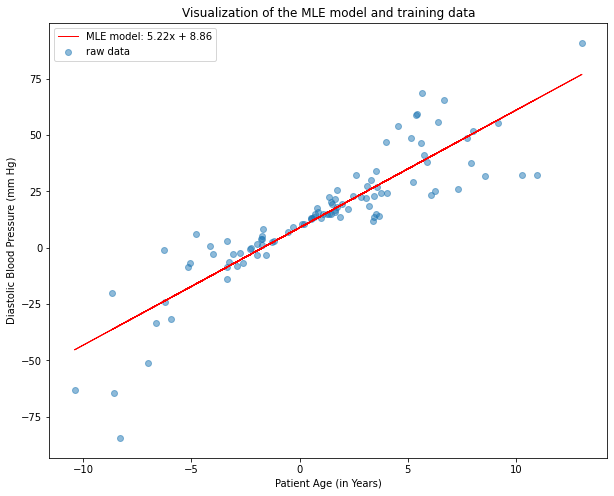

In [4]:
# plot fitted reg and scatterplot of raw data
plt.figure(figsize = (10,8))
plt.scatter(data.x, data.y, alpha = 0.5, label = "raw data")
plt.plot(data.x, y_pred, color='red', linewidth=1, label='MLE model: {}x + {}'.format(slope_mle, intercept_mle))
plt.xlabel("Patient Age (in Years)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")
plt.title("Visualization of the MLE model and training data")
plt.legend()

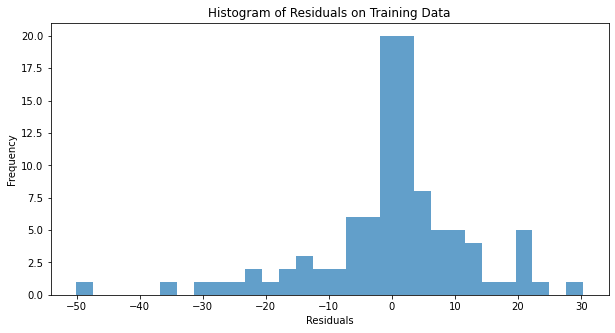

In [5]:
# plot residual histogram
residuals = y - y_pred

# Visualize residuals
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 

ax.hist(residuals, bins=30, alpha = 0.7)
ax.set_title('Histogram of Residuals on Training Data')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
plt.show()

<font color='#00007B'>

$w_0, w_1$: intercept and slope;

**Clinical Meaning**:
* $w_0$ - the diastolic blood pressure (in mm Hg) for a person with age 0;
* $w_1$ - representing the unit change of the patient's diastolic blood pressure (in mm Hg), when the patient age (in years) increase by 1 year.


**Model Evaluation**:

Based on the **plot of fitted linear model and raw data**, we could see that our current noise normal distribution assumption may not be appropriate for this dataset, as the distribution of the residual clearly violates the iid and normal distribution assumptions of noises. We could have mismodeled epsilon.

The residuals are not normally distributed, but a bit left skewed. We could observe that the tails are heavy and the mass is more sharply concentrated around zero than in a normal distribution. You can tell that it is not a good representation as the residuals are considerably large for younger and older people and become lower for people of middle age, the noise varies greatly depends on the X value. This imbalance of residuals suggests that our current modeling of epsilon does not appropriately fit the model. A linear model may be appropriate given that there is a positive linear trend of training data in scatterplot. However, the iid and normal distribution assumption of noise is not appropriate. The residuals seem not independent of value X.

Based on the **interpretation and clinical meaning of parameters**, the data has been preprocessed and normalized, otherwise the fitted model is also not appropriate for the data. For example, the $w_0$ is a positive number `8.86`, indicating the diastolic blood pressure (in mm Hg) for a person with age 0 is `8.86`, and there's even blood pressure for person with negative age, which may not make much sense in practical meaning. It indicates the data may be preprocessed and normalized.

---

## Part II: Bayesian Linear Regression
### (Material covered in CS109 B or equivalent)
In this problem, your task is to perform Bayesian linear regression on the dataset in `HW0_data.csv`.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)\\
w_0 &\sim \mathcal{N}(0, 1)\\
w_1 &\sim \mathcal{N}(0, 0.5)
\end{aligned}
In this model, we assume the same likelihood as in Part I, but we also include priors for $w_0$ and $w_1$: $p(w_0) = \mathcal{N}(0, 1)$, $p(w_1) = \mathcal{N}(0, 0.5)$

1. **(Inference)** Analytically derive the joint posterior distribution over the parameters. That is, analytically compute<br><br>
\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}.\\
\end{aligned}
<br>*Hint: The posterior of a model with a Gaussian (or normal) likelihood and Gaussian priors is yet again Gaussian. This derivation is included in many machine learning textbooks like Machine Learning: a Probabilistic Perspective by Murphy or Pattern Recognition and Machine Learning by Bishop. This derivation also appears online in many course notes - you are welcomed to use any and all available resources.*

**Prev Answer (OUTDATED!)**:

**Notes**: *this section is my prev proof progress, which may not be working till the end, left here as a reference, please check the next cell*
> By Bayes' Rule, we could know that `posterior = likelihood * prior / marginal data likelihood`
>
> $$p(\theta |Y) = \frac{p(Y |\theta) * P(\theta)}{P(Y)}$$
> Given posterior distribution over models, the predictive distribution is 
>
>\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}
\end{aligned}
>
>And as we know, prior follows normal distribution,
>
>$$p(w_0) = \frac{1}{\sqrt{2\pi * 1}} \exp\left\{-\frac{(w_0)^2}{2 * 1} \right\}$$ 
>
>$$p(w_1) = \frac{1}{\sqrt{2\pi * 0.5}} \exp\left\{-\frac{(w_1)^2}{2 * 0.5} \right\} = \frac{1}{\sqrt{\pi}} \exp\left\{-w_1^2\right\}$$
>
>And we obtained from `question 1` that the likelihood function
>
>$$\prod_{n=1}^N p(y_n|x_n, w_1, w_0) 
= \frac{1}{\sqrt{\pi }^N} \exp\left\{\sum_{n=1}^N{-{(y_n - (w_1x_n + w_0))^2}} \right\}$$ 
>
>This gets us the **numerator** of joint posterior distribution:
>
>$$\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)$$
>$$ = \frac{1}{\sqrt{2}*\sqrt{\pi }^{N+2}} \exp\left\{-\frac{w_0^2}{2} - w_1^2 + \sum_{n=1}^N{-{(y_n - (w_1x_n + w_0))^2}} \right\}$$
>
>For the denominator, it is the observed data, which is evidence. Thus is it a fixed constant.
>
>As we know that joint posterior distribution's analytical form is a PDF, the integral of the whole form should be one
>
>\begin{aligned}
\int p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \int \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}\\
= \int \frac{1}{C}*\frac{1}{\sqrt{2}*\sqrt{\pi }^{N+2}} \exp\left\{-\frac{3w_0^2}{2} + \sum_{n=1}^N{-{(y_n - (w_1x_n + w_0))^2}} \right\} = 1
>\end{aligned}


<font color='#00007B'>
    
**Answer (NEW!)**:
    
By Bayes' Rule, we could know that `posterior = likelihood * prior / marginal data likelihood`

$$p(\theta |Y) = \frac{p(Y |\theta) * P(\theta)}{P(Y)}$$
Given posterior distribution over models, the predictive distribution is 

\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}
\end{aligned}

Let $\mathbf{X}$ be the feature matrix and $\mathbf{y}$ be target, that is, 
\begin{aligned}
\mathbf{X}=&\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \\
\mathbf{y}=&\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \\
\end{aligned}

Let $w$ be the coefficient vector $(w_0, w_1)^T \sim N(\mu, \Sigma)$ where,
\begin{aligned}
\mu=&\begin{pmatrix} 0 \\ 0 \end{pmatrix}, \\
\Sigma=&\begin{pmatrix} 1 & 0 \\ 0 & 0.5 \end{pmatrix}
\end{aligned}
We can rewrite the posterior distribution as follows,
\begin{aligned}
p(w|\mathbf{y},\mathbf{X}) = \frac{p(\mathbf{y}|\mathbf{X},w)p(w)}{p(\mathbf{y}|\mathbf{X})} \propto p(\mathbf{y}|\mathbf{X},w)p(w),
\end{aligned}

where
\begin{aligned}
p(\mathbf{y}|\mathbf{X},w)p(w)&=\left( \frac{1}{\sqrt{2\pi\sigma_\epsilon^2}} \right)^N \mathrm{exp}\left\{ -\frac{1}{2\sigma_\epsilon^2}(\mathbf{y} - \mathbf{X}w)^T (\mathbf{y} - \mathbf{X}w)\right\} \frac{1}{\sqrt{|\Sigma|(2\pi)}^2}\mathrm{exp}\left\{-\frac{1}{2}w^T\Sigma^{-1} w \right\} \\
& = const * \mathrm{exp} \left\{ -\frac{1}{2} \left[ \frac{1}{\sigma_\epsilon^2} (\mathbf{y} - \mathbf{X} w)^\top (\mathbf{y} - \mathbf{X} w) + w^\top \Sigma^{-1} w \right] \right\}\\
& =  const * \mathrm{exp} \left\{ -\frac{1}{2} \left[ \frac{1}{\sigma_\epsilon^2} (w^\top \mathbf{X}^\top \mathbf{X} w - 2w^\top \mathbf{X}^\top \mathbf{y} +\mathbf{y}^\top \mathbf{y}) + w^\top \Sigma^{-1} w\right] \right\}\\
&= const * \mathrm{exp} \left\{ -\frac{1}{2} \left[ w^\top (\frac{1}{\sigma_\epsilon^2} \mathbf{X}^\top \mathbf{X} + \Sigma^{-1}) w -2 (\frac{1}{\sigma_\epsilon^2}) \mathbf{y}^\top \mathbf{X} w \right] \right\}\\
\end{aligned}
    

Let $M=\frac{1}{\sigma_\epsilon^2} \mathbf{X}^T\mathbf{X}+\Sigma^{-1}$ and $N=(\frac{1}{\sigma_\epsilon^2})\mathbf{X}^T\mathbf{y}$. Assuming $\mathbf{X}$ is full rank, it is obvious that $M$ is symmetric and positive definite, such that $M^T=M$ and $(M^{-1})^T=M^{-1}$. 
    
Thus, the above could further be reduced into:
\begin{aligned}
    & const * \mathrm{exp} \left\{ -\frac{1}{2} \left[ w^\top (\frac{1}{\sigma_\epsilon^2} \mathbf{X}^\top \mathbf{X} + \Sigma^{-1}) w -2 (\frac{1}{\sigma_\epsilon^2}) \mathbf{y}^\top \mathbf{X} w \right] \right\} \\ 
    & = const * \mathrm{exp} \left\{ -\frac{1}{2} \left[ w^\top M w - 2 N^\top w \right] \right\}\\
    & = const * \mathrm{exp} \left\{ -\frac{1}{2} \left[\left(w-M^{-1} N\right)^\top M\left(w-M^{-1}N\right)-N^\top M^{-1}N \right] \right\}
\end{aligned}
    
    
 Then taking it back into original formula, we get
    
\begin{aligned}
p(\mathbf{y}|\mathbf{X},w)p(w) & = const * \mathrm{exp} \left\{ -\frac{1}{2} \left[ \left(w-M^{-1} N\right)^\top M\left(w-M^{-1} N\right)-N^\top M^{-1} N\right]\right\} \\
& = const * \mathrm{exp} \left\{-\frac{1}{2}\left[\left(w-M^{-1} N\right)^\top M\left(w-M^{-1} N\right)\right]\right\} \mathrm{exp} \left\{-\frac{1}{2}\left[-N^\top M^{-1} N\right]\right\} \\
& \propto \mathrm{exp} \left\{ -\frac{1}{2} \left[ \left(w-M^{-1} N\right)^\top M\left(w-M^{-1} N\right) \right] \right\}
\end{aligned}
    
    
<!-- \begin{aligned}
p(\mathbf{y}|\mathbf{X},w)p(w)&=\frac{\pi^{-\frac{N+2}{2}}}{\sqrt{2}}\mathrm{exp}\left\{ -\mathbf{y}^T\mathbf{y}+w^TN+N^Tw-w^TMw\right\} \\
&=\frac{\pi^{-\frac{N+2}{2}}}{\sqrt{2}}\mathrm{exp}\left\{-\mathbf{y}^T\mathbf{y}-w^TMw+w^TMM^{-1}N+N^T(MM^{-1})^Tw\right\} \\
&=\frac{\pi^{-\frac{N+2}{2}}}{\sqrt{2}}\mathrm{exp}\left\{-\mathbf{y}^T\mathbf{y}-w^TMw+w^TM(M^{-1}N)+(M^{-1}N)^TMw\right\} \\
&=\frac{\pi^{-\frac{N+2}{2}}}{\sqrt{2}}\mathrm{exp}\left\{-\mathbf{y}^T\mathbf{y}-w^TMw+w^TM(M^{-1}N)+(M^{-1}N)^TMw-(M^{-1}N)^TMM^{-1}N+(M^{-1}N)^TMM^{-1}N\right\} \\
&=\frac{\pi^{-\frac{N+2}{2}}}{\sqrt{2}}\mathrm{exp}\left\{-\mathbf{y}^T\mathbf{y}-(w-M^{-1}N)^TM(w-M^{-1}N)+N^TM^{-1}N\right\} \\
&=\frac{\pi^{-\frac{N+2}{2}}}{\sqrt{2}}\mathrm{exp}\left\{-\mathbf{y}^T\mathbf{y}+N^TM^{-1}N\right\}\mathrm{exp}\left\{-(w-M^{-1}N)^TM(w-M^{-1}N)\right\} \\
&=\frac{\pi^{-\frac{N+2}{2}}}{\sqrt{2}}\mathrm{exp}\left\{-\mathbf{y}^T\mathbf{y}+N^TM^{-1}N\right\}\mathrm{exp}\left\{-\frac{1}{2}(w-M^{-1}N)^T(2M)(w-M^{-1}N)\right\}
\end{aligned} -->

It is easily to see that the exponent $\mathrm{exp}\left\{-\frac{1}{2}(w-M^{-1}N)^TM(w-M^{-1}N)\right\}$ can be regarded as the exponent of a multivariate normal distribution, $\mathcal{N}(w;M^{-1}N, M^{-1})$. 
    
Besides, the posterior probability should integrate to 1, so 
\begin{aligned}
\int p(w|\mathbf{y},\mathbf{X})=1&\Rightarrow \int const * \mathrm{exp} \left\{-\frac{1}{2}\left[\left(w-M^{-1} N\right)^\top M\left(w-M^{-1} N\right)\right]\right\} \mathrm{exp} \left\{-\frac{1}{2}\left[-N^\top M^{-1} N\right]\right\} =p(\mathbf{y}|\mathbf{X}) \\ 
&\Rightarrow   const * \mathrm{exp} \left\{-\frac{1}{2}\left[-N^\top M^{-1} N\right]\right\} *  \int \mathrm{exp} \left\{-\frac{1}{2}\left[\left(w-M^{-1} N\right)^\top M\left(w-M^{-1} N\right)\right]\right\}     =p(\mathbf{y}|\mathbf{X}) \\
&\Rightarrow p(\mathbf{y}|\mathbf{X})=const * \mathrm{exp} \left\{-\frac{1}{2}\left[-N^\top M^{-1} N\right]\right\} * 2\pi*\sqrt{|M^{-1}|}\\
\end{aligned}

    
Thus, the final analytical form would be 
   
    
$$\frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}$$
    
 \begin{aligned}
= p(w|\mathbf{y},\mathbf{X}) = \frac{p(\mathbf{y}|\mathbf{X},w)p(w)}{p(\mathbf{y}|\mathbf{X})} \propto p(\mathbf{y}|\mathbf{X},w)p(w),
\end{aligned}
    
$$=\frac{const * \mathrm{exp} \left\{-\frac{1}{2}\left[\left(w-M^{-1} N\right)^\top M\left(w-M^{-1} N\right)\right]\right\} \mathrm{exp} \left\{-\frac{1}{2}\left[-N^\top M^{-1} N\right]\right\}}{const * \mathrm{exp} \left\{-\frac{1}{2}\left[-N^\top M^{-1} N\right]\right\} * \sqrt{2\pi}*\sqrt{|M^{-1}|}}$$
    
$$=\frac{1}{2\pi*\sqrt{|M^{-1}|}} * \mathrm{exp}\left\{-\frac{1}{2}(w-M^{-1}N)^T(M)(w-M^{-1}N)\right\}$$
    
$$ \sim \mathcal{N}(w; M^{-1}N, M^{-1})$$
 
It follows multivariate normal distribution, with mean $M^{-1}N$ and variance $M^{-1}$.
    
with $M=\frac{1}{\sigma_\epsilon^2} \mathbf{X}^T\mathbf{X}+\Sigma^{-1}$ and $N=(\frac{1}{\sigma_\epsilon^2})\mathbf{X}^T\mathbf{y}$ and $\sigma_\epsilon^2 = 0.5$,    
Thus the posterior mean is 
$$ M^{-1}N = (\frac{1}{\sigma_\epsilon^2} \mathbf{X}^T\mathbf{X}+\Sigma^{-1})^{-1}(\frac{1}{\sigma_\epsilon^2})\mathbf{X}^T\mathbf{y}$$
$$ = (2\mathbf{X}^T\mathbf{X}+\Sigma^{-1})^{-1}2\mathbf{X}^T\mathbf{y}$$
    
posterior variance is $$M^{-1} = (\frac{1}{\sigma_\epsilon^2} \mathbf{X}^T\mathbf{X}+\Sigma^{-1})^{-1} = (2 \mathbf{X}^T\mathbf{X}+\Sigma^{-1})^{-1}$$



2. **(Model Interpretation)** Visualize the ***joint posterior*** over the parameters, $p(w_1, w_0 | y, x)$ for the dataset in `HW0_data.csv` (you may use a scatter plot of samples drawn from the posterior or a contour map/heat map of the pdf). In separate plots, visualize the ***marginal posterior*** distribution over each parameter,
\begin{aligned}
p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_0\\
p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_1\\
\end{aligned}
Is the information contained in the joint posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$ equivalent to the information contained in the two marginals $p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n), p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$? That is, what does each distribution tell you?

  Compute the variance of the marginal posterior distributions $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$ empirically using samples from $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$. What do the width of these intervals tell you about your confidence in the model's estimation of the parameters?

   *Hint: it is not necessary to analytically derive the marginals $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$. Recall that you can perform marginalization of a variable by sampling from the joint distribution and disregarding that variable.*

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
#auxiliary functions 
def get_posterior_samples(w0_prior_var, w1_prior_var, noise_var, x_matrix, y_matrix, x_test_matrix, samples=100):
  '''Function to generate samples from the posterior and posterior predictive of a Bayesian linear model'''
  #define the variances of the normal priors for w_0 and w_1
  #note that rather than treating the normal priors for w_0 and w_1 separately,
  #we can jointly express this prior as a bivariate normal distribution with a diagonal covariance matrix
  prior_variance = np.diag([w0_prior_var, w1_prior_var])
  #define the inverse of the prior variance, this is called the precision
  prior_precision = np.linalg.inv(prior_variance)

  #this 'epsilon' offsett is sometimes needed to ensure numerical stability of the matrix inverse operation
  epsilon = 1e-5

  #compute the posterior precision matrix
  posterior_precision = prior_precision + x_matrix.T.dot(x_matrix) / noise_var
  #invert the precision matrix to get the posterior covariance matrix
  posterior_variance = np.linalg.inv(posterior_precision + epsilon * np.ones(x_matrix.shape[1])) 
  #compute hte posterior mean
  posterior_mean = posterior_variance.dot(x_matrix.T.dot(y_matrix)) / noise_var

  #sampling 100 points from the posterior distribution over w_0 and w_1
  posterior_samples = np.random.multivariate_normal(posterior_mean.flatten(), posterior_variance, size=samples)

  #take posterior predictive samples
  posterior_predictions = np.dot(posterior_samples, x_test_matrix.T) 
  posterior_predictive_samples = posterior_predictions[np.newaxis, :, :] + np.random.normal(0, noise_var**0.5, size=(100, posterior_predictions.shape[0], posterior_predictions.shape[1]))
  posterior_predictive_samples = posterior_predictive_samples.reshape((100 * posterior_predictions.shape[0], posterior_predictions.shape[1]))

  return posterior_samples, posterior_predictions, posterior_predictive_samples

In [8]:
# Step 1: define the observation noise variance
noise_variance = 0.5

# Step 2: define the variance of the normal priors on w_0 and w_1
w0_prior_var = 1.
w1_prior_var = 0.5

# Step 3: define the number of samples to draw from the posterior
samples = 1000

# Step 4: concatenate a column of 1's to the training X data so that inference computations can be cast as matrix operations (this increases efficiency)
# we do this using the PolynomialFeatures model from sklearn
poly = PolynomialFeatures(1)
x_poly = poly.fit_transform(x.to_numpy().reshape(-1,1))

# Step 5: get samples from the posterior distribution over w_0 and w_1
posterior_samples, posterior_predictions, posterior_predictive_samples = get_posterior_samples(w0_prior_var, 
                                                                                               w1_prior_var, 
                                                                                               noise_variance, 
                                                                                               x_poly, 
                                                                                               y.to_numpy().reshape(-1,1), 
                                                                                               x_poly, 
                                                                                               samples)


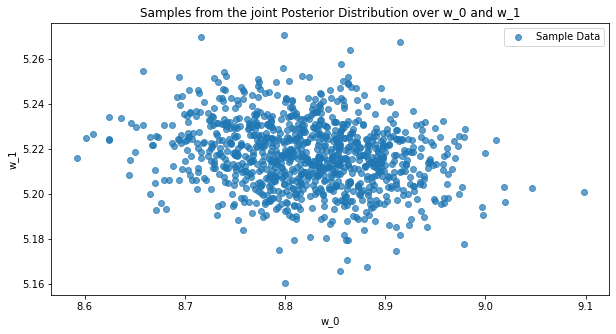

In [9]:
# Step 6. Visualize the posterior samples
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
ax.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.7, label='Sample Data') # scatter plot 
ax.set_title('Samples from the joint Posterior Distribution over w_0 and w_1')
ax.legend(loc='best') # display legend
ax.set_xlabel('w_0') # set the x-axis label
ax.set_ylabel('w_1') # set the y-axis label
plt.show() # display the figure

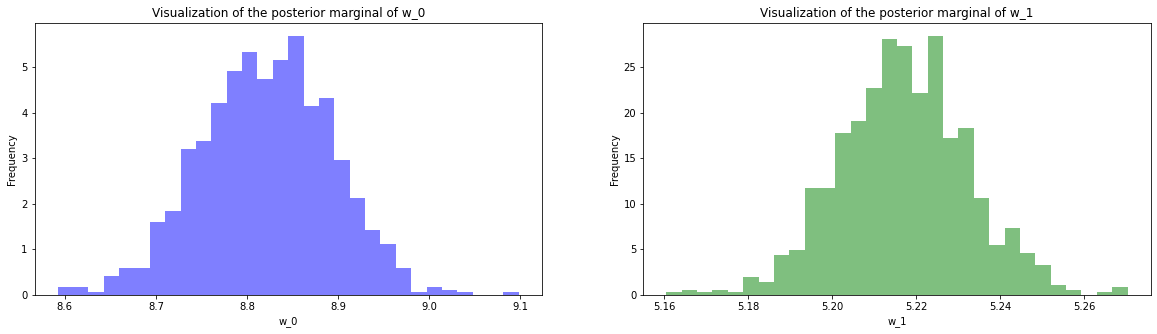

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
#visualize the posterior marginal of w_0
ax[0].hist(posterior_samples[:, 0], density=True, color='blue', bins=30, alpha=0.5)
ax[0].set_xlabel('w_0')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Visualization of the posterior marginal of w_0')


#visualize the posterior marginal of w_1
ax[1].hist(posterior_samples[:, 1], density=True, color='green', bins=30, alpha=0.5)
ax[1].set_xlabel('w_1')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Visualization of the posterior marginal of w_1')
plt.show()

<font color='#00007B'>

Information contained in joint distribution is not equivalent to what is contained in two marginal distribution plots.

* **Marginal Distribution**: it shows the variance and uncertainties in each parameters, showing how each parameter is distributed and the possible range of parameters.

* **Joint Distribution**: it not only shows the variance and uncertainties in each parameters, but also displays a general trend about how two parameters are correlated. For example, here we could observe a slightly negative trend between $w_0$ and $w_1$

In [11]:
# variance of the marginal posterior distributions 
from statistics import variance

variance_w0 = variance(posterior_samples[:, 0])
variance_w1 = variance(posterior_samples[:, 1])

print ("empirically computed variance for w_0 and w_1 are %.4f and %.4f"%(variance_w0, variance_w1))

empirically computed variance for w_0 and w_1 are 0.0052 and 0.0002


<font color='#00007B'>

The quantities $\sigma_{w_0}^2, \sigma_{w_1}^2$ are often said to quantify the uncertainty we have about our estimate of $w_0$ and $w_1$.

As mentioned in the lecture notes, the spread of this distribution over plausible models (i.e. plausible range of $w_0$ and $w_1$) naturally gives us a way to quantify our **uncertainty** over which is the "best" model. When the spread is wide (when many very different models are equally very likely), our uncertainty is high. When the spread is narrow (when all likely models look very similar), our uncertainty is low.

Based on the variance of parameters and the visualization of the posterior samples, it seems $w_1$ has a smaller variance `0.0002` and we are more certain about it. $w_0$ has slightly larger variance `0.0052` and shows a slightly higher level of uncertainties. Generally, they are both small value in mathematical sense, meaning we are quite certain about this model. These uncertainties tells us the reliability of our interpretation of the model parameters varies between a certain range. Generally, the spread is narrow, indicating our uncertainty is low, all likely models would look pretty similar to each other.

3. **(Prediction)** In Bayesian linear regression, we obtain a distribution over possible parameters given the data, $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$, rather than a single ***point-estimate*** of the 'best' parameters. This means that when we predict an outcome for, say, $x=2$ we get a distribution over possible values of $y$ rather than a single $y$. The distribution over the predicted $y$ for a given $x$ is called the ***posterior predictive***, and is denoted $p(y|x)$.

  Visualize the **95% posterior predictive interval** (this is the interval that includes 95% of the posterior predictive values) for the training data -- this is usually visualized as a shaded tube containing the 95% of the posterior predictive values for each test $x$-value. 
  
  What does the 95% posterior predictive interval tell you about the model's uncertainty in its predictions?

In [12]:
# Step 1: compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

# Step 2: compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

# Step 3: compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

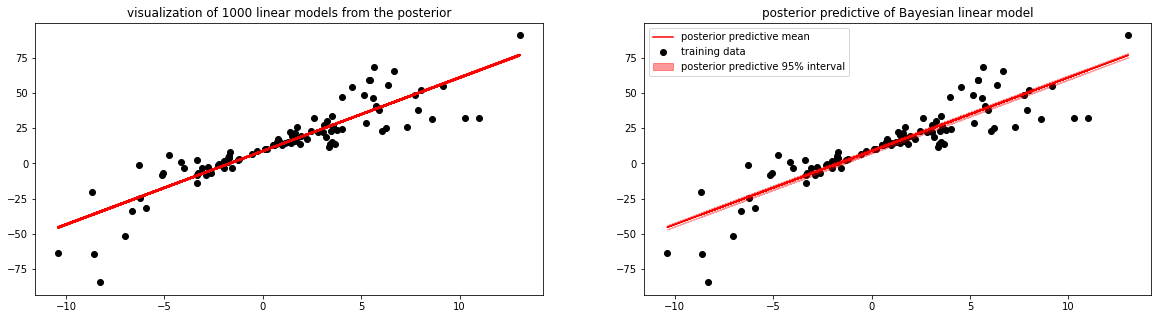

In [13]:
# Step 4: Visualize the posterior predictive distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# visualize the raw data 
ax[0].scatter(data.x, data.y, color='black', label='training data') 

# visualize each model from the posterior
for sample in posterior_predictions:
    ax[0].plot(data.x, sample, color='red', alpha=0.05)

ax[0].set_title('visualization of {} linear models from the posterior'.format(samples))

# visualize the raw data 
ax[1].scatter(data.x, data.y, color='black', label='training data')

# visualize the mean of the posterior predictive
ax[1].plot(x, pp_mean, color='red', label='posterior predictive mean')

# visualize the 95% posterior predictive interval
ax[1].fill_between(data.x, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive 95% interval')

ax[1].legend(loc='best')
ax[1].set_title('posterior predictive of Bayesian linear model')
plt.show()

<font color='#00007B'>

A 95% posterior predictive interval is a range of values that you can be 95% certain contains the true value of the Bayesian linear model. The width of the 95% posterior predictive interval is said to quantify the uncertainty of the Bayeisan model at each input $x$, as it shows the spread of posterior. And the variance, or the spread of posterior shows the level of uncertainty in our model at each point of x, quantitatively.

Looking at the data, different regions in $x$ should lead to different levels of variances and uncertainty. The uncertainty around $x < -5$ and $x>5$ should be larger than the uncertainties in the middle range. 
So actually we would want the uncertainties to be conditional on $x$ and varies with $x$ value. With conditional variances, we would be more informed in making decisions. 

The current plotted 95% posterior predictive interval uncertainties are not what we really want it to be. The model should have higher uncertainty and be less confident in two sides, but the current tube shows constant uncertainty across all $x$ value. With the current 95% posterior interval, it does not help to inform the decisions for treating patients, especially for younger and older patients with higher uncertainties. It indicates a linear bayesian model may not be enough or our normal distribution and iid assumption on noise may not be appropriate, even if we increase the noise variance, it only increase the width of the tube, but didn't change variance based on $x$. 

---

## Part III: Broader Impact Analysis

You've now modeled the same set of data using non-Bayesian and Bayesian regression models. In both paradigms it's possible to identify a 'best' set of model parameters (in the non-Bayesian approach, we compute the MLE; in the Bayesian approach, we can compute the mean or mode of the posterior). For the Bayesian model, we also quantified our uncertainty in the model parameters as well as our uncertainty in the model's predictions. So which model, if any, should we deploy in real life?

Starting in 2020, major machine learning conferences are beginning to ask authors as well as reviewers to explicitly consider the broader impact of new machine learning methods. To properly evaluate the potential good or harm that a piece of technology (AI or not) can do to the general public, we need to be aware that no technology is deployed in ideal conditions or in perfectly neutral contexts. In order to assess the potential broader impact of technology, we need to analyze the social systems/institutions of which these technologies will become a part.

To help you analyze the broader impact of your technology, begin by considering the following questions:

I. Identify the relevant socio-technical systems
  - In what social, political, economic system could the tech be deployed?
  - How would the tech be used in these systems (what role will it take in the decision making processes)?<br><br>
  
II. Identify the stakeholders
  - Who are the users?
  - Who are the affected communities (are these the users)?
  
    ***Hint:*** users are typically decision makers who will use the technology as decision aids (e.g. doctors), whereas affected communities may be folks who are impacted by these decisions but who are not represented in the decision making process (e.g. patients).<br><br>
    
III. What types of harm can this tech do?
  - What kinds of failures can this tech have?
  - What kinds of direct harm can these failures cause?
  - What kinds of harm can the socio-technical system cause?
  
    ***Hint:*** many technical innovations have niche applications, they may sit in a long chain of decision making in a complex system. As such, it may seem, at first glance, that these technologies have no immediate real-life impact. In these cases, it’s helpful to think about the impact of the entire system and then think about how the proposed innovations aid, hamper or change the goals or outcomes of this system.<br><br>
    
IV. What types of good can this tech do?
  - What kinds of needs do these users/communities have?
  - What kinds of constraints do these users/communities have?

1. **(Impact)** Analyze the broader impact of these two models. Specifically, focus on anticipating ways these models can interact with other components of the decision systems in which they will be deployed, identifying end-users, affected communities as well as anticipating the effects (positive and negative) on affected communities (in particular, does the model have the same effect on all subpopulations in the affected communities?).

<font color='#00007B'>

In healthcare, from improved disease screening to treatment plan, these model could have huge positive and negative social, economical and political impacts. Policymakers needs to understand these pros and cons, to build policies that amplify the benefits and mitigate the risks. Model developers also need to be part of this conversation: to help anticipate and assess the social impact of its applications, and promote initiatives to steer research and society in beneficial directions.
    
The affected community will be patients, and the end user will be the doctors, healthcare giver, clinics, hospitals etc. There is clearly imbalance of power structure between end user and affected community. In real life, end users will use this model to inform their decision making, and affected community could only passively accept end users' treatment and diagnosis. Patients who are impacted by these decisions may not be represented in the decision making process. For healthcare industry, false negative or false positive cases that diagnose patients' symptons wrongly could result in severe downside consequences. 

From the model, we could observe that it only makes sense to people of age in the middle range and does a bad job for younger people and older population. For the border cases we might need to analyze more parameters (diastolic pressure may not just dependent on age) to make a good prediction, as there is more uncertainties in those border age range.

The difference between two models, in real life, may be that MLE model considers whole population and fit one set of best estimator for all group of users; while Bayesian brings in prior belief about parameters, fitted different models and shows uncertainty level, it considers different group of users and individuals better. In this sense, MLE may be biased towards particular minority group, though it is easily interpretation. And Bayesian model may be giving more information about variance of prediction and uncertainty level, while at the same time, it is more computationally intensive.

The models do not have the same effect on all subpopulations in the affected communities. It may be inappropriate to deploy the model in a real-life clinical setting, as it may not be applicable for children and older population with high variance in residuals. The uncertainty around young age and older age is relatively high. In real life, for certain subpopulations, it could be much more dangerous to misdiagnose their blood pressure. For example, wrong treatment for old people and younger people would be especially problematic, as they are more vulnerable. The model result could also be misleading for children with high blood pressure, because it assumes that all children have lower blood pressure than adults. The may thus receive wrong treatment, miss the critical time to get right treatments, or even lost their life due to wrong treatments.

For end users, their goal might be using the model as a decision making tool to treat patient more efficiently with the most suitable care and treatment possible. 
For affected community, their goal would be get recovered from sickness, disease, or simply a medical check to inform their further action or treatment.
The relationship between end-users and affected communities is important to think about because the interests/goals of end users and the affected community may not always align. And when they do not, as a developer of algorithm and model, we need to be careful about deploying model, and has to make a decision about to whose interest are developers obligated. In this case, patients needs to be specially taken care of because getting the right treatment is a basic human rights and is an essential concern about their health. Technology is no longer value neutral but somehow value laden in this case. We need to educate end user to handle the output with care and disclose more information for them to make informed decision making, or let them incorporate human decision making to do a double check before proceeding with any treatment.
    
    

2. **(Mitigation)** Which model, if any, would you recommend to deploy? Why? 

  What information should the ML designer/engineer disclose to the end-users to mitigate potential negative impacts?

<font color='#00007B'>
    
I would recommend deploying baysesian model as it incorporates prior beliefs. Posterior shows the level of uncertainty in our model at each point of x, quantitatively. It considers the entire population. 

MLE only looks for a point where the likehood is maximized, so it is universally across the whole population. The estimator may be unbiased on majority but biased on minority. 
    
As mentioned above, the difference between two models, in real life, may be that MLE model considers whole population together and fit one set of best estimator for all group of users; while Bayesian brings in prior belief about parameters, gives possible spread of fitted estimator through bootstrapping and shows uncertainty level, it considers different group of users and individuals better. In this sense, MLE may be biased towards particular minority group, though it is easily interpretable. And Bayesian model may be giving more information about variance of prediction and uncertainty level, while at the same time, it is more computationally intensive (more matrix multiplications). Bayesian model has the possibility of further being customized to fit various needs, for instance, making w dependent on features. 
    
To mitigate potential negative impacts, the following information could be shared and disclosed to end-users, in order for them to better understand the model and interpret the model to affected community. It also help them to handle the output with extreme care, and factor into human decision making for second layer guarantee when it comes to some special edge cases. So that in general, it won't be a black box for end users who incorporate this model in their daily decision making. 
* underlying math model
* key idea of the model, what to expect, input & output of the model
* possible constraints, limitation of the model
* uncertainty level
* downside consequences
* differences model prediction for different subgroups of populations